## <center>Regression with gekko<center>

In [1]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt  

### Polynomial regression

In [2]:
xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,0.8,2.0])

#### Solution
m = GEKKO()
m.options.IMODE=2
# coefficients
c = [m.FV(value=0) for i in range(4)]
x = m.Param(value=xm)
y = m.CV(value=ym)
y.FSTATUS = 1
# polynomial model
m.Equation(y==c[0]+c[1]*x+c[2]*x**2+c[3]*x**3)

In [3]:
# linear regression
c[0].STATUS=1
c[1].STATUS=1
m.solve(disp=False)
p1 = [c[1].value[0],c[0].value[0]]
print(p1)

[0.19999999995, 9.7190732222e-11]


In [4]:
# quadratic
c[2].STATUS=1
m.solve(disp=False)
p2 = [c[2].value[0],c[1].value[0],c[0].value[0]]
print(p2)

[0.10991483984, -0.16977420298, 0.10050000502]


In [5]:
# cubic
c[3].STATUS=1
m.solve(disp=False)
p3 = [c[3].value[0],c[2].value[0],c[1].value[0],c[0].value[0]]
print(p3)

[0.029999999778, -0.11666666299, 0.21333332024, 0.099500015491]


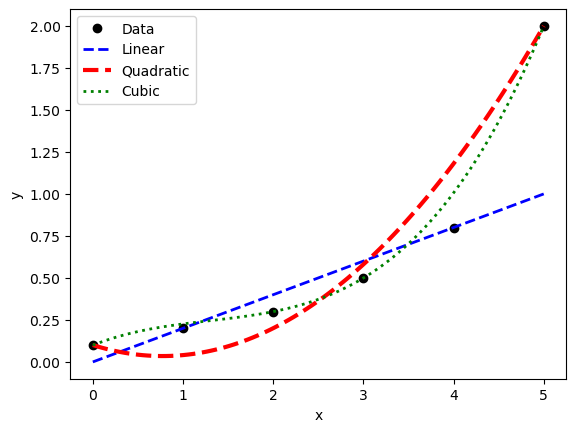

In [6]:
# plot fit
plt.plot(xm,ym,'ko')
xp = np.linspace(0,5,100)
plt.plot(xp,np.polyval(p1,xp),'b--',linewidth=2)
plt.plot(xp,np.polyval(p2,xp),'r--',linewidth=3)
plt.plot(xp,np.polyval(p3,xp),'g:',linewidth=2)
plt.legend(['Data','Linear','Quadratic','Cubic'],loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Non-polynomial regression

Optimized, a = 0.062679870689
Optimized, b = 0.69252241477


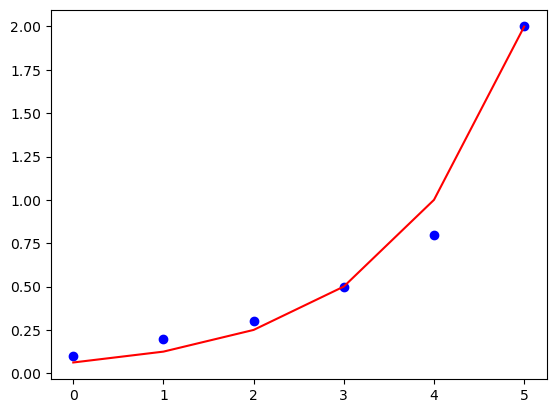

In [7]:
# GEKKO model
m = GEKKO()

# parameters
x = m.Param(value=xm)
a = m.FV()
b = m.FV()
a.STATUS=1
b.STATUS=1

# variables
y = m.CV(value=ym)
y.FSTATUS=1

# regression equation
m.Equation(y==a*m.exp(b*x))

# regression mode
m.options.IMODE = 2

# optimize
m.solve(disp=False)

# print parameters
print('Optimized, a = ' + str(a.value[0]))
print('Optimized, b = ' + str(b.value[0]))

plt.plot(xm,ym,'bo')
plt.plot(xm,y.value,'r-')
plt.show()